In [1]:
#setup
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community


# In graph 1 , ingrdients are the nodes
# In graph 2 , recipes are the nodes

Name: 
Type: Graph
Number of nodes: 220
Number of edges: 686
Average degree:   6.2364


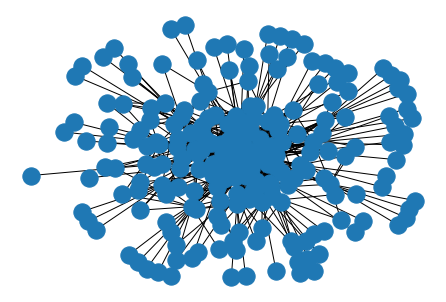

In [4]:
# read edge list
g = nx.read_edgelist("ingredients.txt")
ug = nx.to_undirected(g)
#bibpartite graph
nx.draw(ug)
print(nx.info(ug))

In [5]:
#bi to uni 
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community
from networkx.algorithms import bipartite


g = nx.read_edgelist("ingredients.txt")
c = bipartite.color(g)
nx.set_node_attributes(g, c, 'bipartite')

type1  = {n for n, d in g.nodes(data=True) if d['bipartite']==0}
type2  = {n for n, d in g.nodes(data=True) if d['bipartite']==1}
ug1 = bipartite.projected_graph(g, type1)
ug2 = bipartite.projected_graph(g, type2)

print('Uni Graph 1:\n'+nx.info(ug1))

print('Uni Graph 2:\n'+nx.info(ug2))

Uni Graph 1:
Name: 
Type: Graph
Number of nodes: 165
Number of edges: 2335
Average degree:  28.3030
Uni Graph 2:
Name: 
Type: Graph
Number of nodes: 55
Number of edges: 1398
Average degree:  50.8364


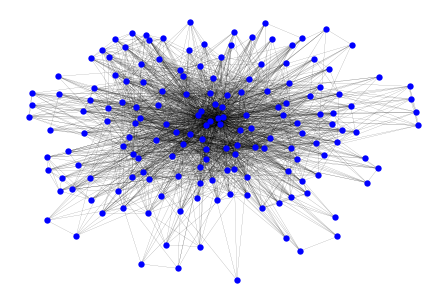

In [7]:
options = {
    'node_color': 'blue',
    'node_size': 40,
    'line_color': 'black',
    'linewidths': 0,
    'width': 0.1,
}
nx.draw(ug1, **options)
plt.savefig ("simple_graph.png")

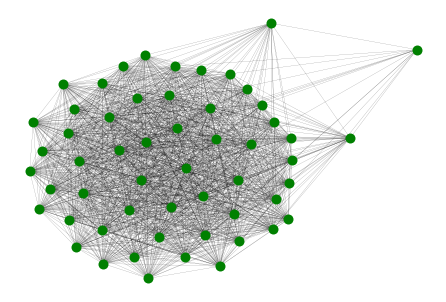

In [8]:
options = {
    'node_color': 'green',
    'node_size': 100,
    'line_color': 'black',
    'linewidths': 0,
    'width': 0.1,
}
nx.draw(ug2, **options)
plt.savefig ("simple_graph.png")

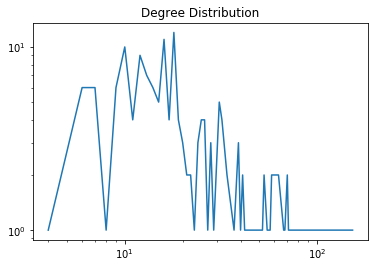

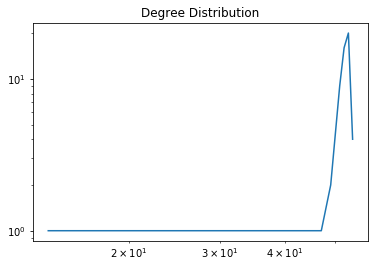

In [9]:
#degree distributor
def plot_degree_distribution(wiki):
    degs = {}
    for n in wiki.nodes():
        deg = wiki.degree(n)

        if deg not in degs:
            degs[deg] = 0

        degs[deg] += 1
    items = sorted(degs.items())

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot([k for (k, v) in items], [v for (k, v) in items])
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title("Degree Distribution")
    fig.savefig("degree_distribution.png")


plot_degree_distribution(ug1)
plot_degree_distribution(ug2)

Graph1


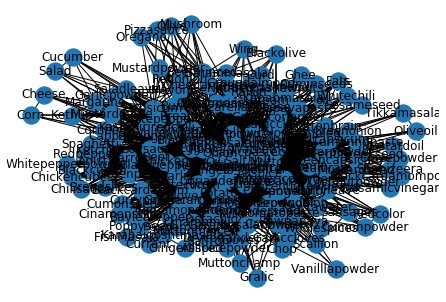

In [10]:
# draw a network with labels
print('Graph1')
nx.draw(ug1, with_labels=True)


Graph2


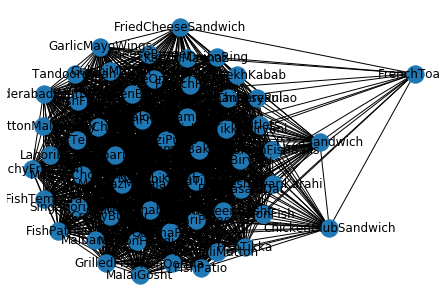

In [11]:
# draw a network with labels
print('Graph2')
nx.draw(ug2, with_labels=True)


In [12]:
# basic analysis

# number of nodes
print("number of nodess:",nx.number_of_nodes(ug1))

#number of edges
print("number of edges:",nx.number_of_edges(ug1))

#average clustering
print('average clustering: ',nx.average_clustering(ug1))

# diameter
print("Diameter:",nx.diameter(ug1))
# this diameter shows ...

# average degree
sum = 0
for n in ug1.nodes():
    sum = sum + ug1.degree(n)
print("Average degree:", sum/ug1.number_of_nodes())

number of nodess: 165
number of edges: 2335
average clustering:  0.804881190260126
Diameter: 3
Average degree: 28.303030303030305


In [13]:
# basic analysis

# number of nodes
print("number of nodes:",nx.number_of_nodes(ug2))

#number of edges
print("number of edges:",nx.number_of_edges(ug2))

#average clustering
print('Average Clustering: ', nx.average_clustering(ug2))

# diameter
print("Diameter:",nx.diameter(ug2))
# this diameter shows ...

# average degree
sum = 0
for n in ug2.nodes():
    sum = sum + ug2.degree(n)
print("Average degree:", sum/ug2.number_of_nodes())

number of nodes: 55
number of edges: 1398
Average Clustering:  0.9678617838683743
Diameter: 2
Average degree: 50.836363636363636


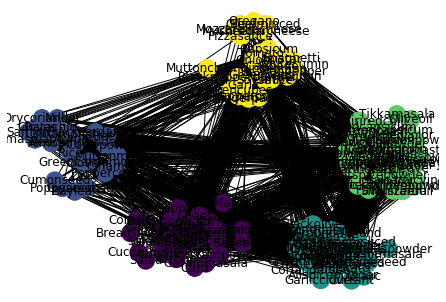

Graph 1 : Nodes are the ingredients 


In [28]:
# taken from https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx/43541777
# you need to install louvain package by using the following command
# pip install python-louvain --user


def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs, k= 0.1, iterations=400)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

from community import community_louvain
partition = community_louvain.best_partition(ug1)
pos = community_layout(ug1, partition)
cols = [float(i) for i in partition.values()]
nx.draw(ug1,pos, node_color=cols, with_labels=True); 
plt.show()
print('Graph 1 : Nodes are the ingredients ')

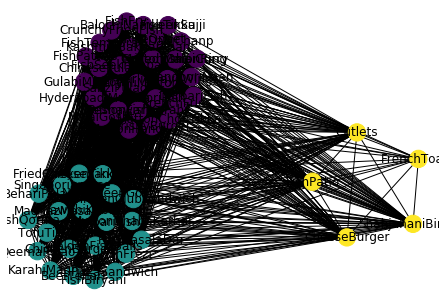

Graph 2 : Nodes are the Recipes


In [34]:
# taken from https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx/43541777
# you need to install louvain package by using the following command
# pip install python-louvain --user


def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs, k= 0.1, iterations=400)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

from community import community_louvain
partition = community_louvain.best_partition(ug2)
pos = community_layout(ug2, partition)
cols = [float(i) for i in partition.values()]
nx.draw(ug2,pos, node_color=cols, with_labels=True); 
plt.show()
print('Graph 2 : Nodes are the Recipes')